In [40]:
import pandas as pd

# Always display all columns (no matter how many there are)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

from plotnine import *

Load polling data

In [41]:
# read raw_polls.csv from FiveThirtyEighta
raw_polls_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/pollster-ratings/raw-polls.csv'
polls = pd.read_csv(raw_polls_url, parse_dates=['electiondate', 'polldate'])

# saves a copy of this CSV onto your computer
polls.to_csv('raw_polls.csv', index=False) 

# add a column to separate national polls from state level polls
polls['national'] = polls['location'].apply(lambda x: True if x=='US' else False)

# add a column that counts the days until the election
polls['days_until_election'] = polls['electiondate'] - polls['polldate']

# show the first 2 rows of the data frame
polls.head(2)

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,error,bias,rightcall,advancedplusminus,comment,national,days_until_election
0,26013,87909,1455,1998,1998_Gov-G_NY,NY,Gov-G,Gov-G,Blum & Weprin Associates,32,Live Phone,NaN,1998-10-13,364.0,Peter Vallone,13080,DEM,26.0,George Pataki,13083,REP,57.0,9.0,-31.0,1998-11-03,33.16,54.32,-21.15,9.85,-9.85,1.0,1.461561,for New York Daily News | WABC-TV (New York),False,21 days
1,26255,87926,1456,1998,1998_Gov-G_OH,OH,Gov-G,Gov-G,University of Cincinnati (Ohio Poll),346,Live Phone,NaN,1998-10-13,540.0,Lee Fisher,13085,DEM,37.0,Bob Taft,13086,REP,52.0,NaN,-15.0,1998-11-03,44.69,50.05,-5.36,9.64,-9.64,1.0,4.285789,NaN,False,21 days


# American Research Group

Does this pollster have a historical track record of accuracy?

In [42]:
arg_polls = polls[polls.pollster == 'American Research Group']
arg_polls.head(3)

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,error,bias,rightcall,advancedplusminus,comment,national,days_until_election
315,7384,9127,7115,2000,2000_Pres-D_NH,NH,Pres-P,Pres-D,American Research Group,9,Live Phone,NaN,2000-01-27,600.0,Al Gore,222,DEM,50.0,Bill Bradley,224,DEM,43.0,NaN,7.0,2000-02-01,49.73,45.59,4.14,2.86,NaN,1.0,-4.200408,NaN,False,5 days
318,7384,9129,7116,2000,2000_Pres-R_NH,NH,Pres-P,Pres-R,American Research Group,9,Live Phone,NaN,2000-01-27,600.0,John McCain,14677,REP,36.0,George W. Bush,241,REP,34.0,17.0,2.0,2000-02-01,48.53,30.36,18.17,16.17,NaN,1.0,4.630006,NaN,False,5 days
342,7357,9084,7115,2000,2000_Pres-D_NH,NH,Pres-P,Pres-D,American Research Group,9,Live Phone,NaN,2000-01-30,600.0,Al Gore,222,DEM,50.0,Bill Bradley,224,DEM,45.0,NaN,5.0,2000-02-01,49.73,45.59,4.14,0.86,NaN,1.0,-5.545723,NaN,False,2 days


In [43]:
print(polls.bias.mean())
print(arg_polls.bias.mean())

0.6262817316409792
0.11302325581395348


In [52]:
polls['is_arg'] = polls.pollster.apply(lambda x: 'ARG' if x == 'American Research Group' else 'not ARG')

In [58]:
polls.pivot_table(index='year', 
                  columns=['is_arg', 'type_simple'], 
                  values='error', 
                  aggfunc='mean').round(1).fillna('')

is_arg        ARG                             not ARG                        \
type_simple Gov-G House-G Pres-G Pres-P Sen-G   Gov-G House-G Pres-G Pres-P   
year                                                                          
1998                                              8.1     6.9                 
1999                                              6.6                         
2000          6.0            4.2    6.2           3.7     4.6    4.4    8.0   
2001                                              3.4                         
2002          5.0     5.0                 2.2     5.4     5.6                 
2003                                              7.1                         
2004                  8.2    2.3   10.7   7.5     3.2     5.4    3.1    6.5   
2005                                              3.7                         
2006                 10.1                 2.0     4.7     6.0                 
2007                                              3.7     2.8                 
2008          2.6            3.6    9.0   5.7     4.8     5.8    3.4    7.1   
2009                                              4.0     6.2                 
2010                                      2.0     4.7     6.7                 
2011                                              5.5     3.7                 
2012                         5.1    8.2           4.7     5.4    3.6    8.6   
2013                                              5.7    10.9                 
2014          4.0                         2.7     4.8     6.7                 
2015                                              6.3    23.0                 
2016          1.7            5.1   10.1   3.1     6.2     5.3    5.0    9.3   
2017                                              5.2     4.0                 
2018                                              4.7     4.9                 
2019                                              4.9     6.2                 
2020         26.8           11.6    8.6   1.4     6.5     6.6    4.8   10.2   

is_arg             
type_simple Sen-G  
year               
1998          6.8  
1999               
2000          5.4  
2001               
2002          4.9  
2003               
2004          5.0  
2005               
2006          5.2  
2007               
2008          4.9  
2009               
2010          5.5  
2011               
2012          4.7  
2013          3.4  
2014          5.4  
2015               
2016          5.4  
2017          6.0  
2018          4.1  
2019               
2020          5.6

/Users/mehtad/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/mehtad/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/mehtad/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 9 rows containing missing values.
/Users/mehtad/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


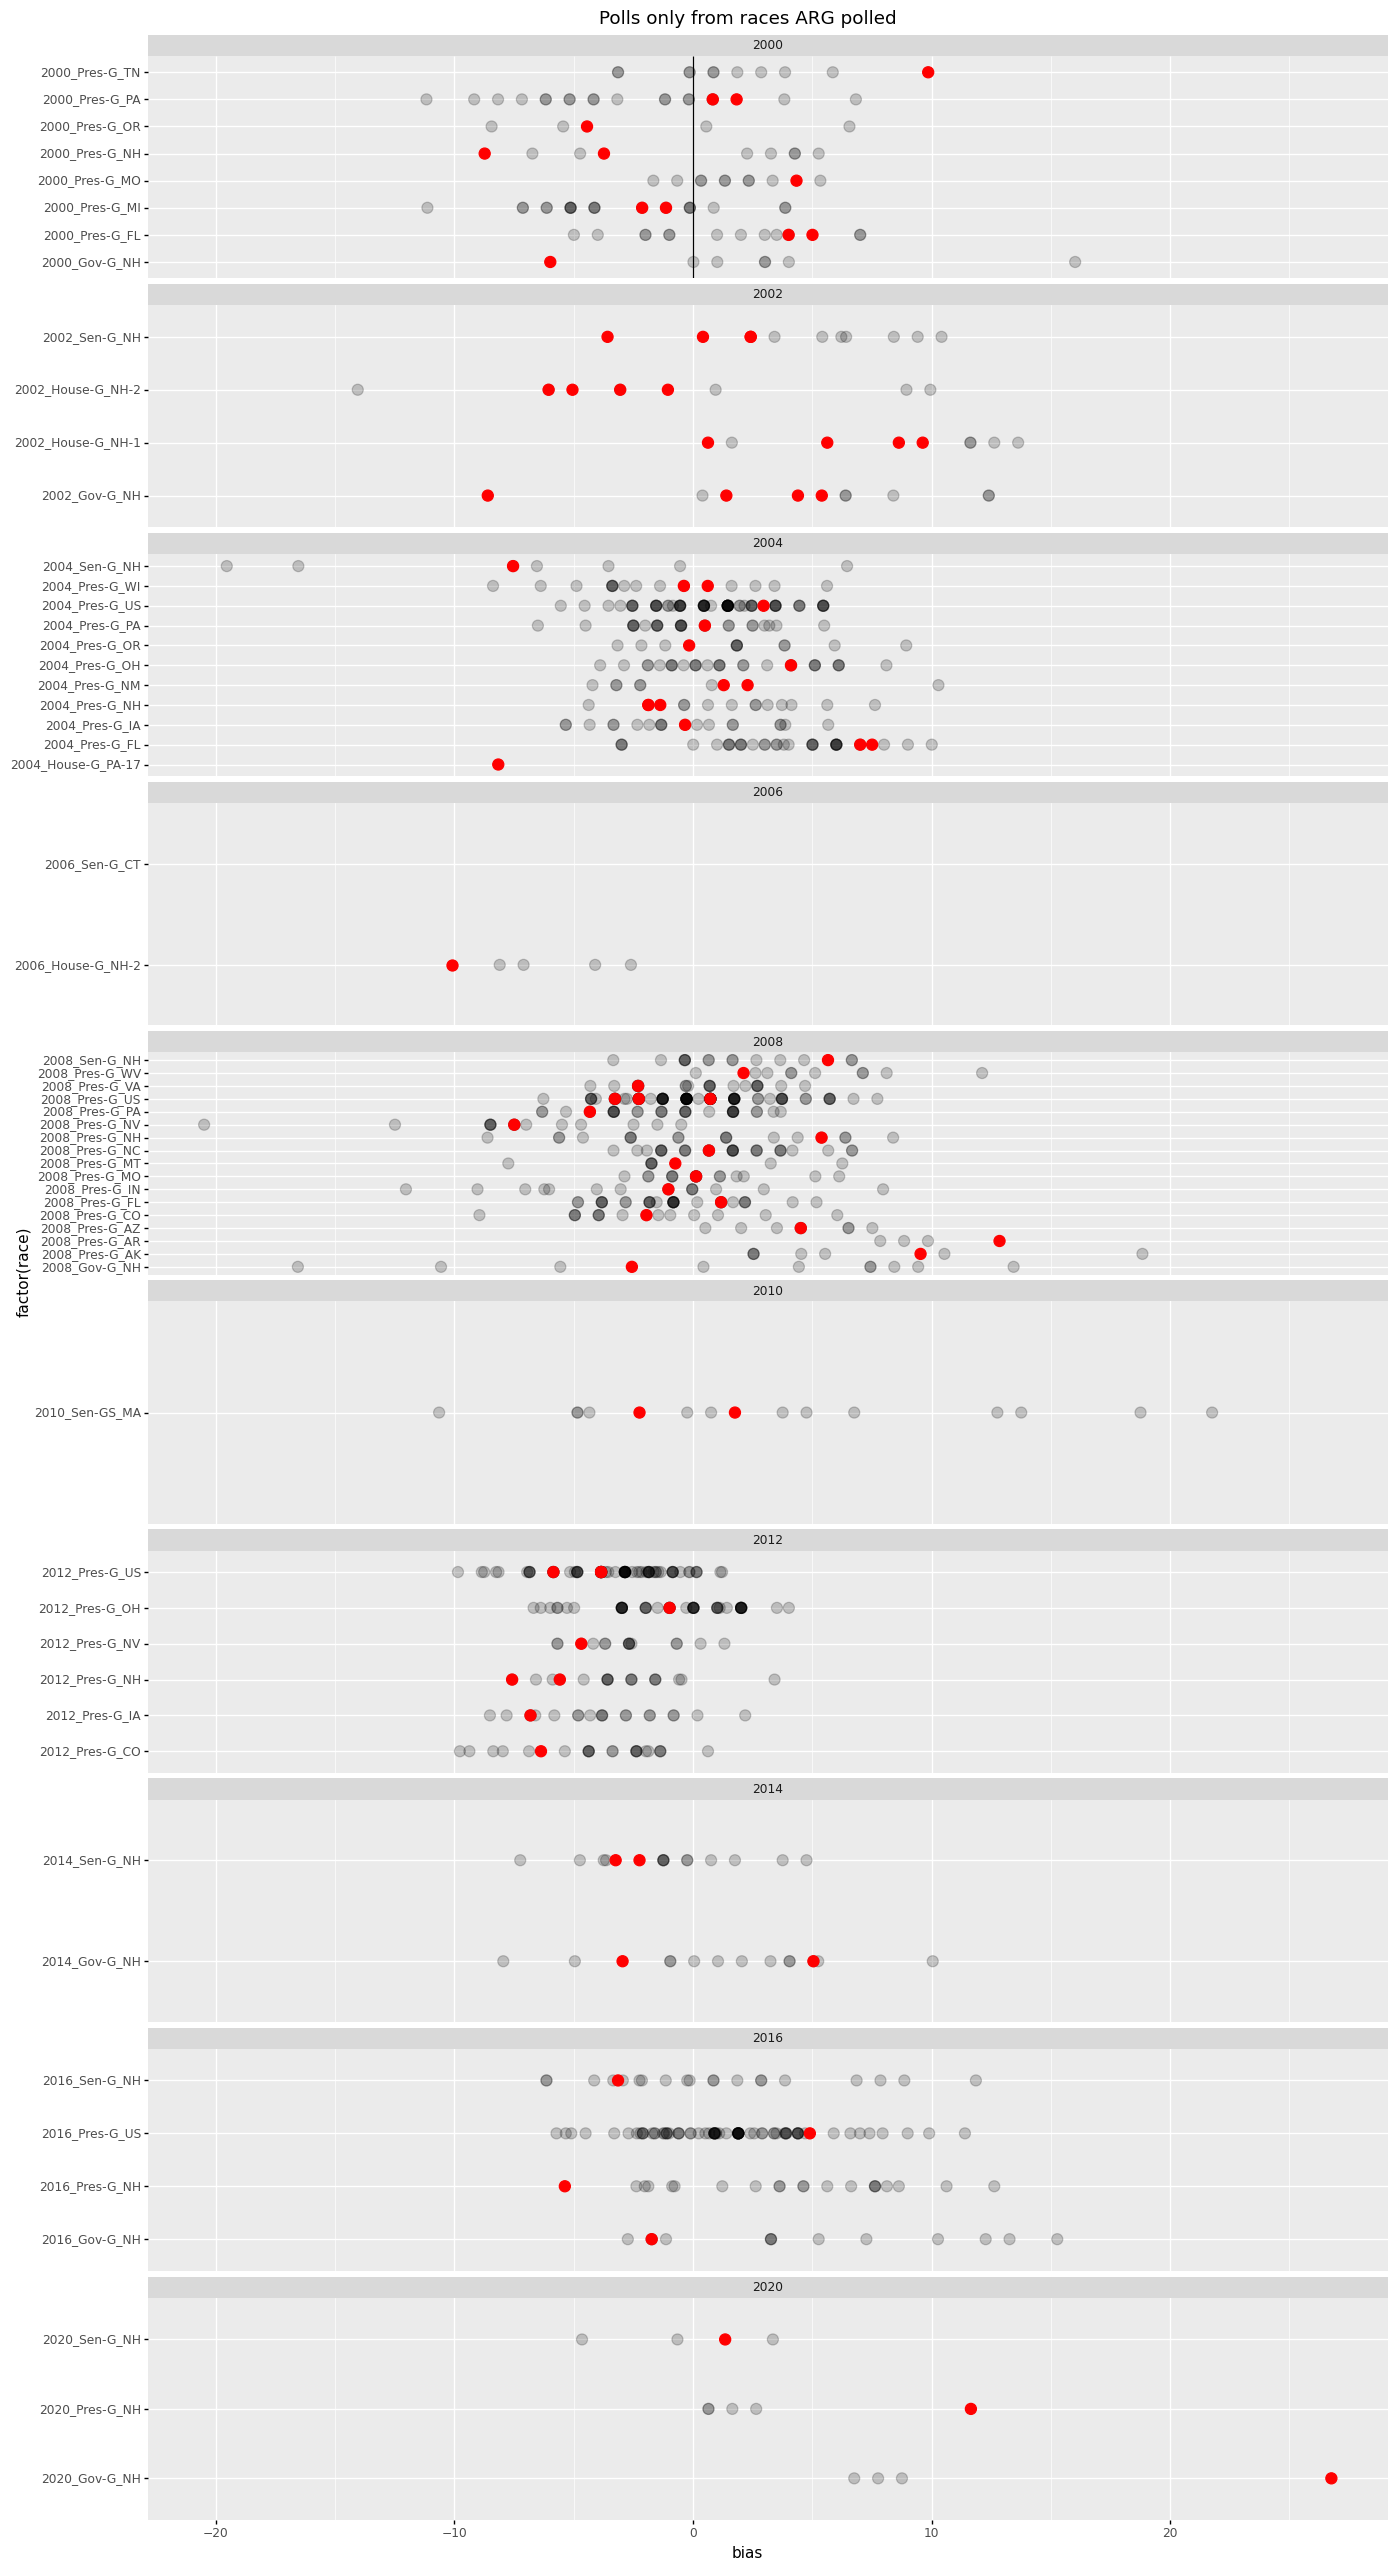

<ggplot: (335385829)>

In [56]:
races_arg_polled = arg_polls.race.unique()
my_polls = polls.query('race.isin(@races_arg_polled) and type_simple != "Pres-P"')

(
    ggplot() + 
        geom_point(my_polls.query('pollster!="American Research Group"'), aes(x='bias', y='factor(race)'), alpha=.2, size=4) + 
        geom_point(my_polls.query('pollster=="American Research Group"'), aes(x='bias', y='factor(race)'), color='red', size=4) + 
        geom_vline(aes(xintercept=0)) +
        facet_wrap('year', ncol=1, scales='free_y') +
        labs(title = "Polls only from races ARG polled") +
        theme(figure_size = (16,32))
)
